## Packages and Assets

In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

import pickle


## Dependencies

In [36]:
test = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')
y_test = test['label']

In [37]:
with open('../../assets/traditional_assets/cv_set.pkl', 'rb') as fout:
    cv_vec, cv_best_model = pickle.load(fout)

with open('../../assets/traditional_assets/tfidf_set.pkl', 'rb') as fout:
    tfidf_vec, tfidf_best_model = pickle.load(fout)


In [38]:
cv_best_model

LogisticRegression(C=0.1, solver='sag')

In [39]:
tfidf_best_model

KNeighborsClassifier(metric='cosine', n_neighbors=23, weights='distance')

## Functions

In [40]:
def viewPredictedRows(X_test, y_test, y_pred):
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    df['correct'] = df['y_test'] == df['y_pred']
    df['correct'] = df['correct'].apply(lambda x: 'Correct' if x else 'Incorrect')
    df['title'] = X_test
    return df


In [41]:
def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

## Predictions considering best traditional models for both vectorization

### CountVectorizer

In [42]:
X_test = cv_vec.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=cv_vec.get_feature_names_out())
X_test_names

,abaixo,abertura,abicom,absurdo,aceita,acelerar,acendem,acionistas,acompanha,acordo,...,vender,vermelho,vespera,vinculante,vinculantes,volatil,volatilidade,volume,vontade,warren
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

           0       0.56      0.84      0.67       109
           1       0.56      0.23      0.33        95

    accuracy                           0.56       204
   macro avg       0.56      0.54      0.50       204
weighted avg       0.56      0.56      0.51       204

Confusion Matrix


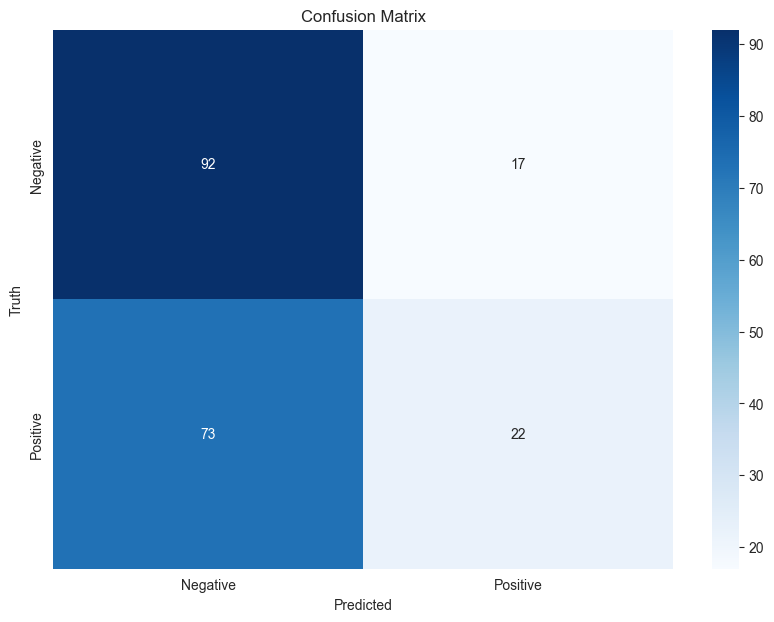

In [43]:
y_pred = cv_best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [44]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)

df_results

,y_test,y_pred,correct,title
0,0,1,Incorrect,magazine luiza acao indicada investir semana v...
1,0,0,Correct,ibovespa engata <NUM> alta fecha acima <NUM> m...
2,1,1,Correct,dividendos petrobras valem risco investir estatal
3,0,0,Correct,petroleiros norte fluminense aprovam acordo pe...
4,0,0,Correct,diretor governanca conformidade petrobras plan...
...,...,...,...,...
199,1,0,Incorrect,ibovespa fecha alta nova york reduz impeto
200,1,0,Incorrect,petrobras reduz diesel gasolina refinarias <NU...
201,1,1,Correct,ibovespa fecha alta recuperacao wall street al...
202,1,0,Incorrect,petrobras utilizara tecnologia reduzir custos ...


### TFIDF

In [45]:
X_test = tfidf_vec.transform(test['title']).toarray()
X_test_names = pd.DataFrame(X_test, columns=tfidf_vec.get_feature_names_out())
X_test_names

,abaixo,abertura,abicom,absurdo,aceita,acelerar,acendem,acionistas,acompanha,acordo,...,vender,vermelho,vespera,vinculante,vinculantes,volatil,volatilidade,volume,vontade,warren
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


              precision    recall  f1-score   support

           0       0.59      0.74      0.66       109
           1       0.58      0.41      0.48        95

    accuracy                           0.59       204
   macro avg       0.59      0.58      0.57       204
weighted avg       0.59      0.59      0.58       204

Confusion Matrix


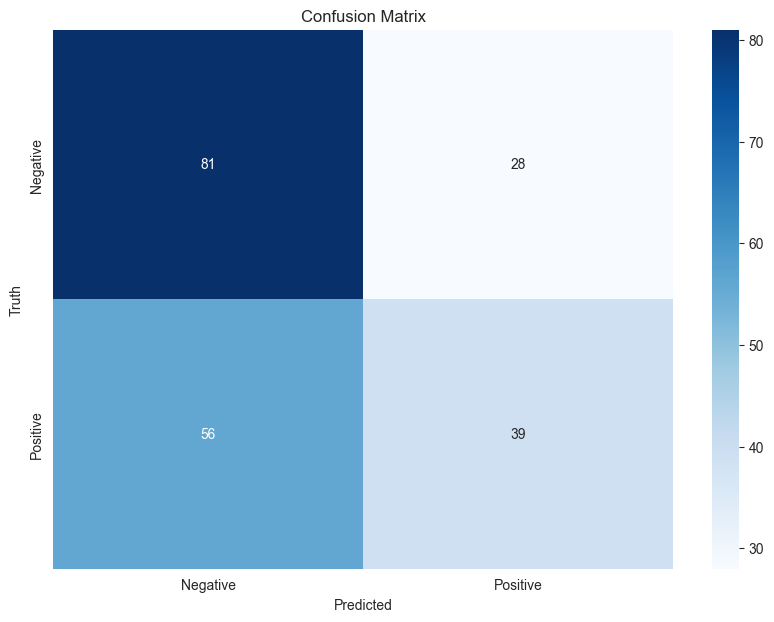

In [46]:
y_pred = tfidf_best_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)

In [47]:
df_results = viewPredictedRows(test['title'], y_test, y_pred)
df_results

,y_test,y_pred,correct,title
0,0,1,Incorrect,magazine luiza acao indicada investir semana v...
1,0,0,Correct,ibovespa engata <NUM> alta fecha acima <NUM> m...
2,1,1,Correct,dividendos petrobras valem risco investir estatal
3,0,0,Correct,petroleiros norte fluminense aprovam acordo pe...
4,0,0,Correct,diretor governanca conformidade petrobras plan...
...,...,...,...,...
199,1,0,Incorrect,ibovespa fecha alta nova york reduz impeto
200,1,0,Incorrect,petrobras reduz diesel gasolina refinarias <NU...
201,1,0,Incorrect,ibovespa fecha alta recuperacao wall street al...
202,1,0,Incorrect,petrobras utilizara tecnologia reduzir custos ...
